# LBP Texture Features of an Image

Text(0.5, 1.0, 'Image with the LBP Features')

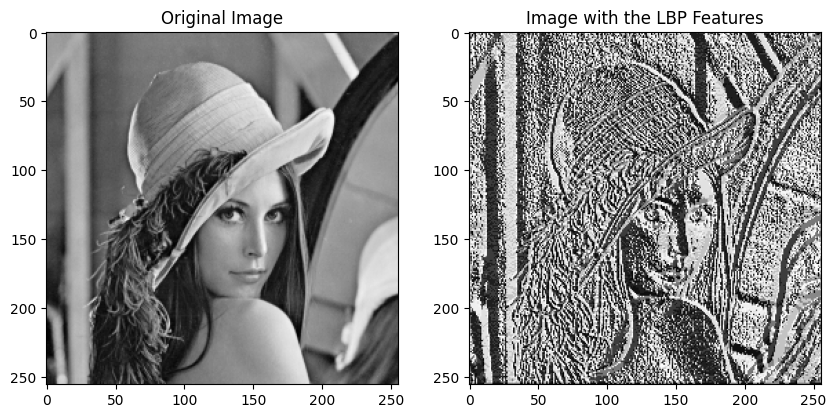

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(10,10))

image1=cv2.imread('/content/drive/MyDrive/Colab Notebooks/Standard Images/lena_color_256.tif')
image1=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
height,width=image1.shape

def get_pixel(image,center,x,y):
  new_value=0
  try:
    if image[x][y]>=center:
      new_value=1
  except:
    pass
  return new_value

def lbp_calculated_pixel(image,x,y):
  center=image[x][y]
  value=[]

  #going from top left to right to bottom to bottom left and back on top
  value.append(get_pixel(image,center,x-1,y-1))
  value.append(get_pixel(image,center,x-1,y))
  value.append(get_pixel(image,center,x-1,y+1))
  value.append(get_pixel(image,center,x,y+1))
  value.append(get_pixel(image,center,x+1,y+1))
  value.append(get_pixel(image,center,x+1,y))
  value.append(get_pixel(image,center,x+1,y-1))
  value.append(get_pixel(image,center,x,y-1))

  #converting to binary values to decimals
  power_val=[1,2,4,8,16,32,64,128]
  val=0
  for i in range(len(value)):
    val+=value[i]*power_val[i]
  return val


#creating an array for LBP
lbp=np.zeros((height,width),np.uint8)

for i in range(0, height):
    for j in range(0, width):
        lbp[i, j] = lbp_calculated_pixel(image1, i, j)

fig.add_subplot(121)
plt.imshow(image1,cmap='gray')
plt.title("Original Image")

fig.add_subplot(122)
plt.imshow(lbp,cmap='gray')
plt.title("Image with the LBP Features")